In [1]:
%matplotlib inline

In [2]:
sites = ["10155000", "13200000", "09180500"]

In [10]:
from rating_gp.models.gpytorch import RatingGPMarginalGPyTorch as RatingGP
from rating_gp.providers import usgs

In [31]:
# Select a date range
start_date = "1900-10-01"
end_date = "2021-09-30"
site = "12413470"
df = usgs.get_measurements(site=sites[0], start_date=start_date, end_date=end_date)

In [32]:
model = RatingGP()
# dir(model)

In [33]:
%%time
model.fit(target=df["discharge"], covariates=df[["stage"]], target_unc=df["discharge_unc"], iterations=400)

100%|██████████████████| 400/400 [00:04<00:00, 83.53it/s, loss=-0.373]

CPU times: user 8.14 s, sys: 2.7 s, total: 10.8 s
Wall time: 4.81 s


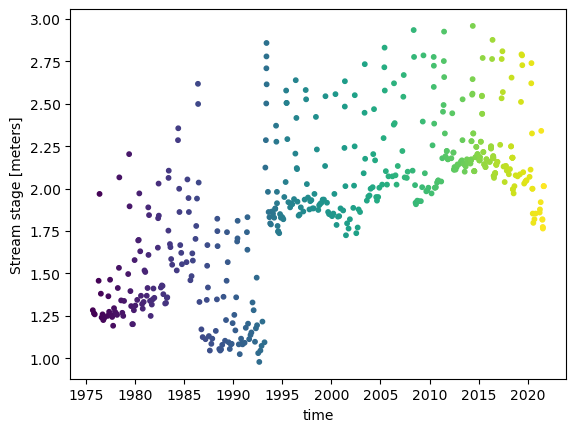

In [36]:
model.plot_stage()

In [9]:
import torch

data_dim = 2


class LargeFeatureExtractor(torch.nn.Sequential):
    def __init__(self):
        super(LargeFeatureExtractor, self).__init__()
        self.add_module("linear1", torch.nn.Linear(data_dim, 1000))
        self.add_module("relu1", torch.nn.ReLU())
        self.add_module("linear2", torch.nn.Linear(1000, 500))
        self.add_module("relu2", torch.nn.ReLU())
        self.add_module("linear3", torch.nn.Linear(500, 50))
        self.add_module("relu3", torch.nn.ReLU())
        self.add_module("linear4", torch.nn.Linear(50, 2))


feature_extractor = LargeFeatureExtractor()

In [10]:
x = torch.tensor([1.0, 2.0])

In [12]:
feature_extractor(x)[0]

tensor(0.0723, grad_fn=<SelectBackward0>)